# Homework 4: Graph Spectra
### Authors: Fabio Camerota, Gianluca Ruberto

# Solution

In this homework we have implemented the spectral graph clustering algorithm described in the paper [On Spectral Clustering: Analysis and an algorithm](http://ai.stanford.edu/~ang/papers/nips01-spectral.pdf) by Andrew Y. Ng, Michael I. Jordan, and Yair Weiss.

In particular, we have analyzed two graphs.
The [first](https://canvas.kth.se/courses/36211/files/5772162/download?wrap=1) was prepared by Ron Burt. He dug out the 1966 data collected by Coleman, Katz, and Menzel on medical innovation. They collected data from physicians in four towns in Illinois, Peoria, Bloomington, Quincy, and Galesburg.

The [second](https://canvas.kth.se/courses/36211/files/5772206/download?wrap=1) is constructed synthetically.

The first step of the algorithm suggests to build the affinity matrix, but since we're dealing with edges of a graph (instead of general data points), we're creating the Adjacency Matrix A.
We use networkx library to load and represent the graph. 
To perform the actual clustering we rely on K-means clustering algorithm provided by Scikit Learn.

## Import libraries

In [1]:
import networkx as nx
import numpy as np
from scipy import linalg
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')

## Spectral graph clustering algorithm definition

In [2]:
def spectralClustering(G: nx.Graph, k: int):
    #Return the graph adjacency matrix as a NumPy matrix
    A = nx.to_numpy_matrix(G)
    #compute the degree matrix that is a diagonal matrix whose (i,i)-element is the sum of A's i-th row
    D = np.diagflat(np.sum(A, axis=1))
    #compute the Laplacian matrix L as defined in the paper
    D_inv = linalg.inv(np.sqrt(D)) #linalg is a Scipy linear algebra library
    L = np.dot(np.dot(D_inv, A), D_inv) #dot product
    #Note that computing L or computing I-L is the same, because only the eigenvalues changes but not the eigenvectors (as stated in the paper)
    #find the k largest eigenvectors of L and form the matrix X by stacking the eigenvectors in columns
    eigenvalues, eigenvectors = linalg.eigh(L)  # returns eigenvalues,eigenvectors in ascending order
    #print(type(eigenvectors)) #numpy matrix (it's a 2D array)
    X = eigenvectors[:, -k:] # Take k largest eigenvectors
    #form the matrix Y from X by renormalizing each of X's rows to have a unit length
    Y = X / linalg.norm(X, axis=1, keepdims=True)
    # k-means cluster
    labels = KMeans(n_clusters=k).fit(Y).labels_
    #compute the fiedler vector that is the eigenvector corresponding to the second smallest eigenvalue of the Laplacian matrix L.
    eigenvalues, eigenvectors = linalg.eigh(D-A)#L=D-A we consider the un-normalized Laplacian matrix
    fiedler = eigenvectors[:, 1] #we take the second smallest eigenvalue, since they're in ascending order
    return labels, fiedler

## Graph 1

By observing the result, we can guess that this graph is disconnected and composed by 4 separated communities (clusters)

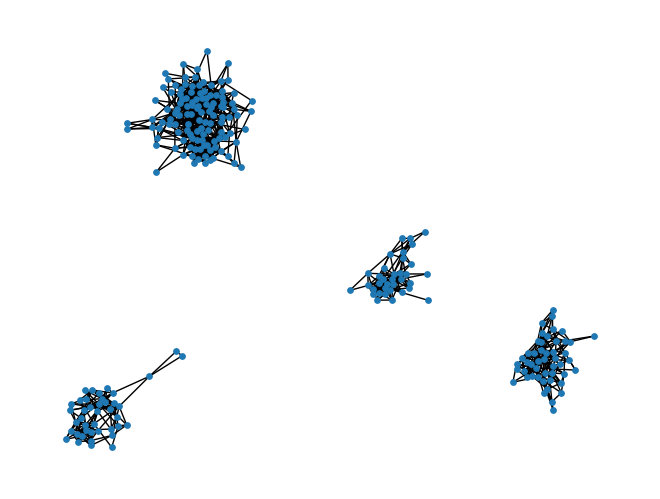

In [3]:
#"read_edgelist" function takes as input the path to a file containing a list of edges in a graph and outputs the graph in the form of a networkx class.
G = nx.read_edgelist(path="example1.dat",delimiter=',')
nx.draw(G, node_size=15)
plt.show()

## Adjacency Matrix

We plot the Adjacency Matrix that shows the existing edges between the nodes, where a black point means there's an edge. The Sparsity Pattern shows that there is one large community and three smaller communities.

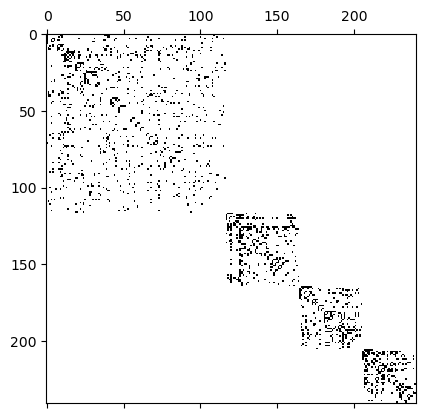

In [4]:
A = nx.to_numpy_matrix(G) #compute the adjacency matrix
plt.spy(A)

## Spectral graph clustering algorithm

We apply "spectral graph clustering algorithm" that indeed identifies 4 clusters. Every color represents the class given by this clustering algorithm.
Usually k is an hyper-parameter but in this case, thanks to the sparsity pattern, we can see that the best k is 4.

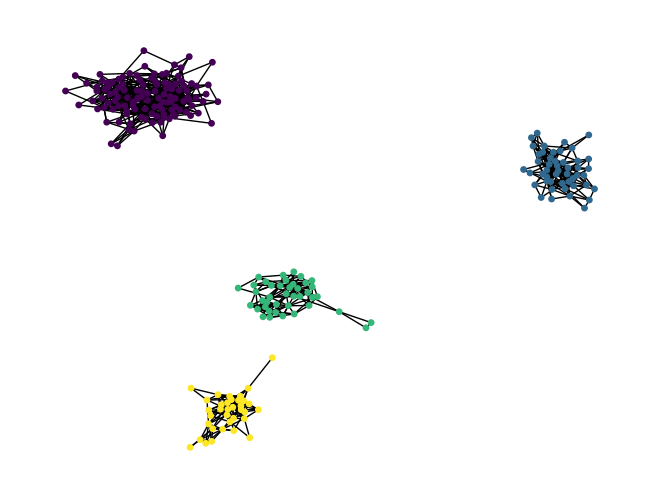

In [5]:
k=4
labels,fiedler = spectralClustering(G,k)
nx.draw(G, node_size=15, node_color=labels)
plt.show()

## Fiedler vector

This is the sorted Fiedler vector that is the eigenvector corresponding to the second smallest eigenvalue of the Laplacian matrix L.
It's important to note that this graph is disconnected and the Fiedler vector can be computed only on connected graphs. This is the reason why the chart looks strange.

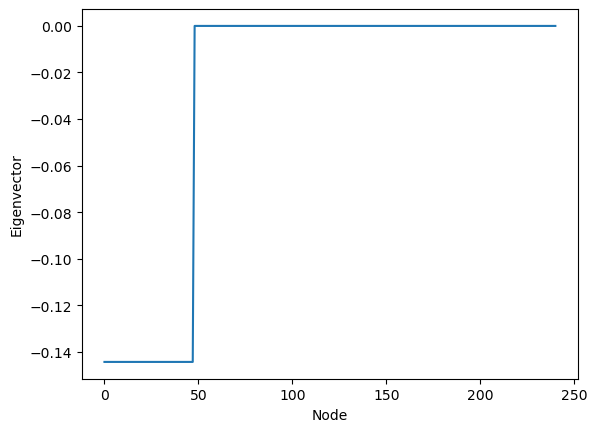

In [6]:
plt.plot(np.sort(fiedler))
plt.xlabel("Node")
plt.ylabel("Eigenvector");

## Graph 2

We can see that this time the graph isn't disconnected, and that there're two clusters, so we can guess the best k is 2

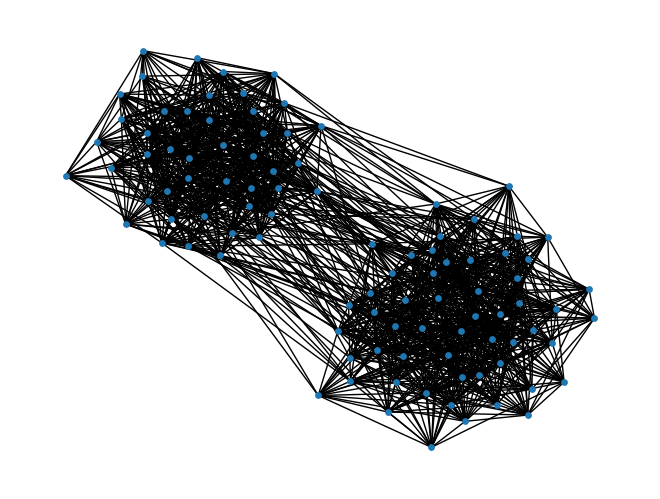

In [7]:
#same as Graph1 but "read_weighted_edgelist" consider a list of edges with weights
G = nx.read_weighted_edgelist(path="example2.dat",delimiter=',')
nx.draw(G, node_size=15)
plt.show()

## Adjacency Matrix

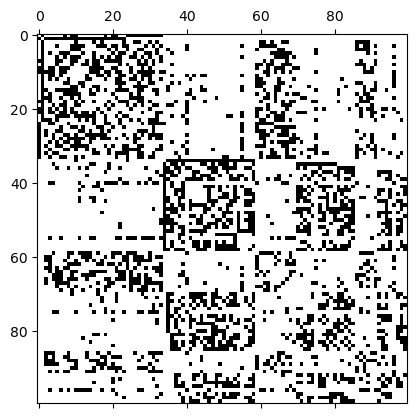

In [8]:
A = nx.to_numpy_matrix(G) #compute the adjacency matrix
plt.spy(A)

## Spectral graph clustering algorithm

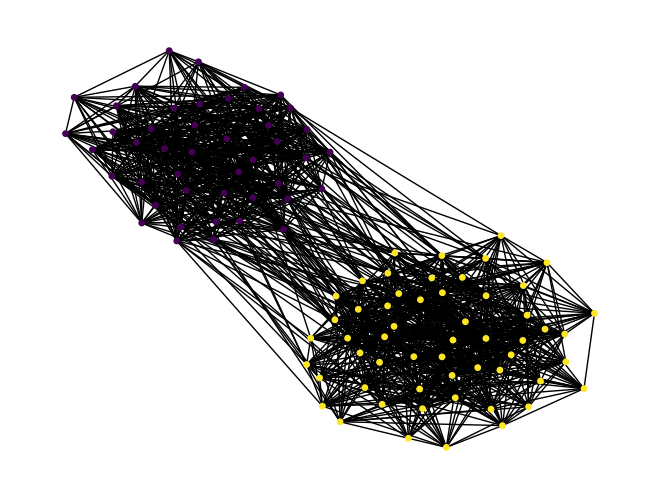

In [9]:
k=2
labels,fiedler = spectralClustering(G,k)
nx.draw(G, node_size=15, node_color=labels)
plt.show()

## Fiedler vector

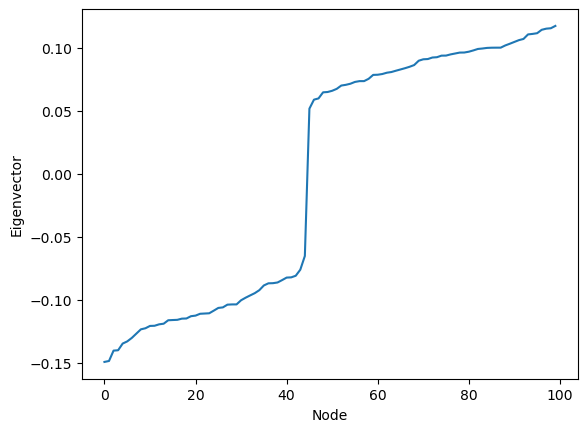

In [10]:
plt.plot(np.sort(fiedler))
plt.xlabel("Node")
plt.ylabel("Eigenvector");
#As shown at the end of Homework4 assignment example, this is the right shape of the fiedler vector when there're 2 clusters.